In [ ]:
# installs necessary libraries
! pip install gwpy
! pip install pycbc

In [3]:
# mounts drive to access data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment 1: Challenge 1


In [ ]:
# imports necessary functions and libraries
from gwpy.timeseries import TimeSeries
import gwpy

In [5]:
# reads the data file and outputs the time and sample rate
data=TimeSeries.read('/content/drive/My Drive/Colab Notebooks/challenge1.gwf', channel="H1:CHALLENGE1")
print('Duration:',(data.times[-1]-data.times[0]))
print ('Sample rate:',data.sample_rate)

Duration: 127.999755859375 s
Sample rate: 4096.0 Hz


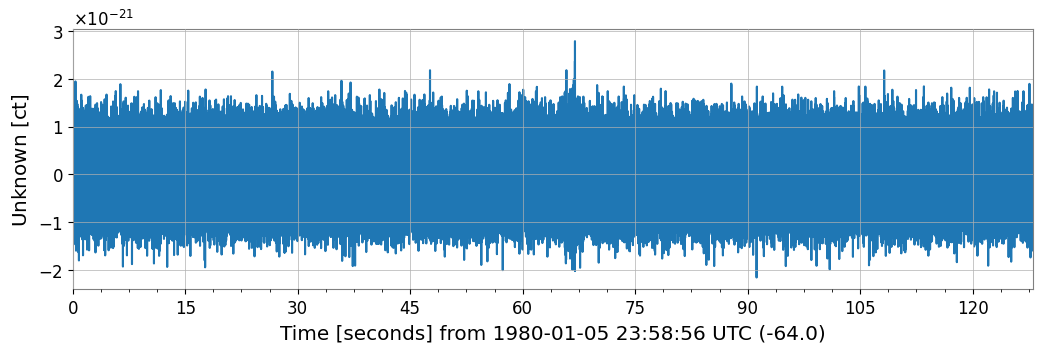

In [6]:
# plots the data in the time domain
plot=data.plot()

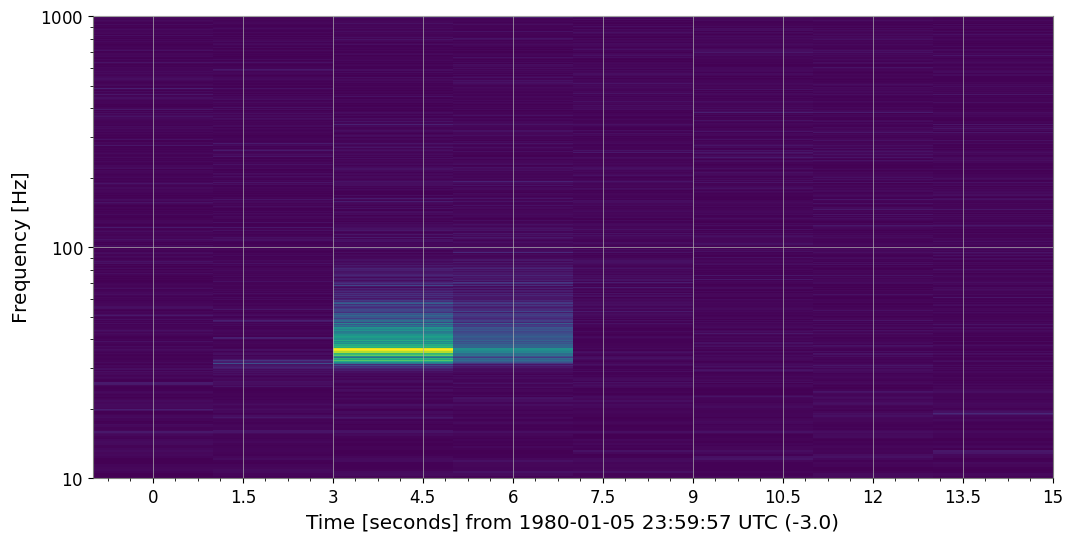

In [7]:
# creates spectrogram and zooms in on the signal
spec=data.spectrogram2(fftlength=4,overlap=2,window='hann')
specplot=spec.plot()
ax=specplot.gca()
ax.set_xlim(-4,12)
ax.set_yscale('log')
ax.set_ylim(10,1000);


Spectrogram is inconclusive q transform may be more helpful.

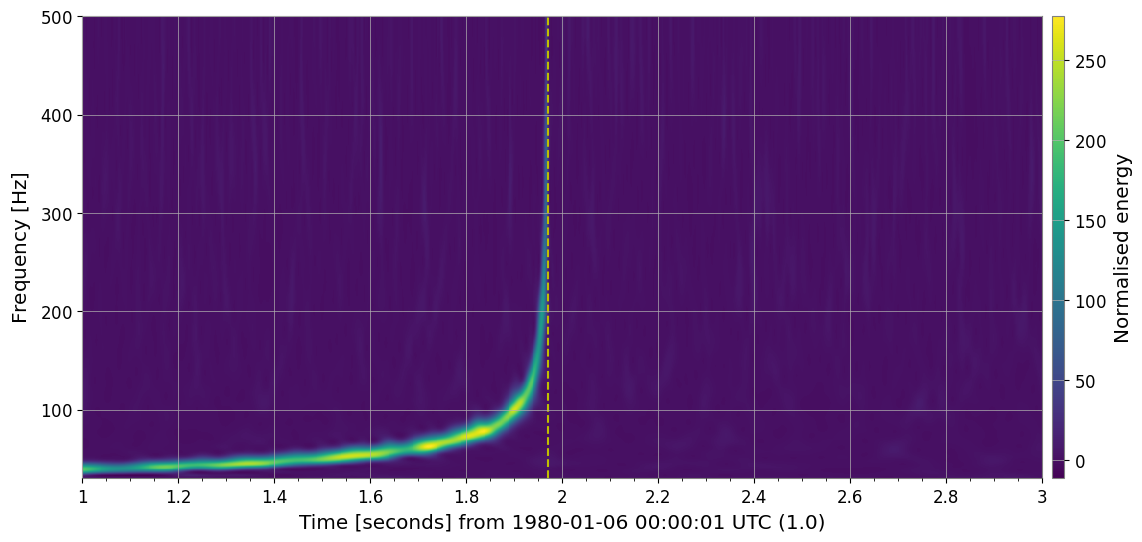

In [8]:
# plots q transform and vertical line for time estimate
import matplotlib.pyplot as plt
q=data.q_transform(frange=(30,500),qrange=(10,15),outseg=(2,4))
qplot=q.plot()
qplot.colorbar(label="Normalised energy")
t_est=2.97
plt.axvline(x=t_est, color='y', linestyle='--')
plt.show()


In [9]:
print('Time of merger: 1980-01-06 00:00:'+str(t_est))

Time of merger: 1980-01-06 00:00:2.97


# Assignment 1: Challenge 2


In [10]:
from pycbc.waveform import get_td_waveform
import pylab

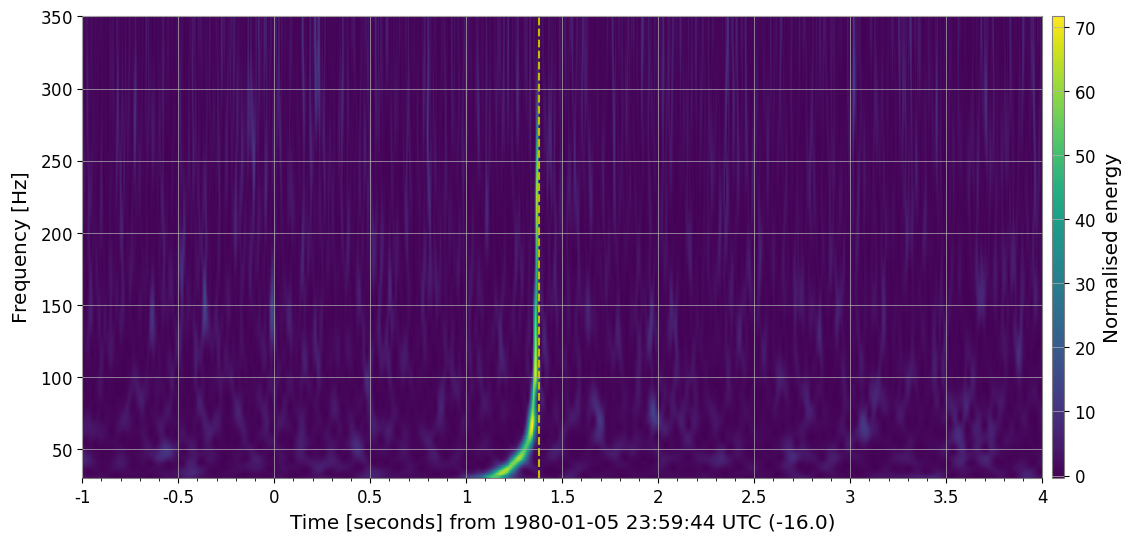

Time of merger: 1980-01-05 23:59:45.38


In [11]:
data = TimeSeries.read('/content/drive/My Drive/Colab Notebooks/challenge2.gwf', channel="H1:CHALLENGE2")
import matplotlib.pyplot as plt
# plots the q transform
q=data.q_transform(frange=(30,350),qrange=(10,15),outseg=(-17,-12))
qplot=q.plot()
qplot.colorbar(label="Normalised energy");
# plots a time estimate line
t_est=-14.62
plt.axvline(x=t_est, color='y', linestyle='--')
plt.show()
# prints the conclusion
print('Time of merger: 1980-01-05 23:59:'+str(60+t_est))

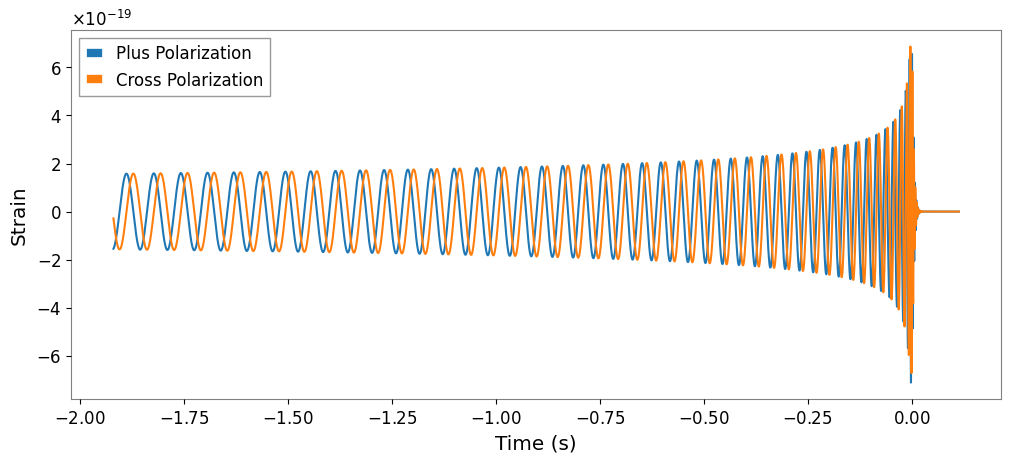

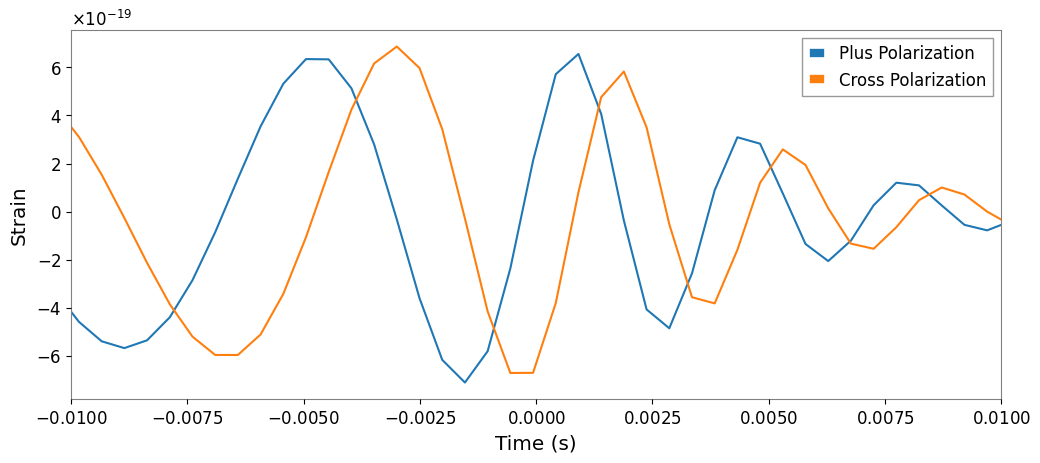

In [17]:
# imports necessary pycbc functions
from pycbc import frame
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import resample_to_delta_t, highpass, matched_filter
# imports the data in a pycbc format
strain = frame.read_frame('/content/drive/My Drive/Colab Notebooks/challenge2.gwf', 'H1:CHALLENGE2')
# removes low frequency values
strain = highpass(strain, 15.0)
  # downsamples the data
strain = resample_to_delta_t(strain, 1.0/2048)
# crops the data to remove artifacts
conditioned = strain.crop(2, 2)
# generates a waveform template
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=strain.delta_t,
                         f_lower=15)
# plots the waveform
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zooms in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

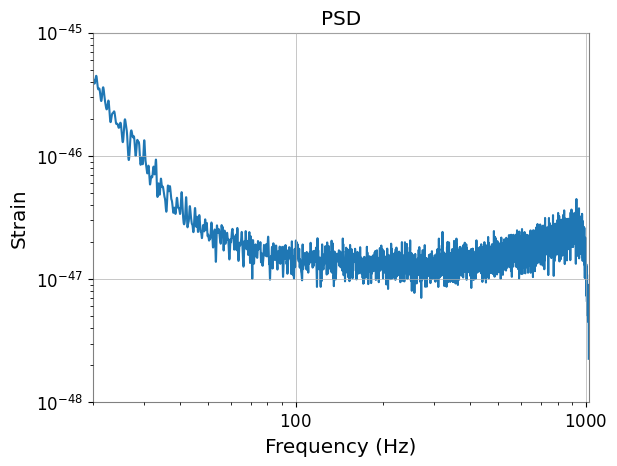

In [18]:
# generates a psd of the processed data
psd=conditioned.psd(4);
# matches the delta f of the psd and the data
psd = interpolate(psd, conditioned.delta_f)
# removes low frequency values from the psd
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)
# plots the psd
plot=plt.loglog(psd.sample_frequencies, psd)
plt.xlim(xmin=20, xmax=psd.sample_rate/2)
plt.title('PSD')
plt.ylim(ymin=1e-48,ymax=1e-45)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.show()


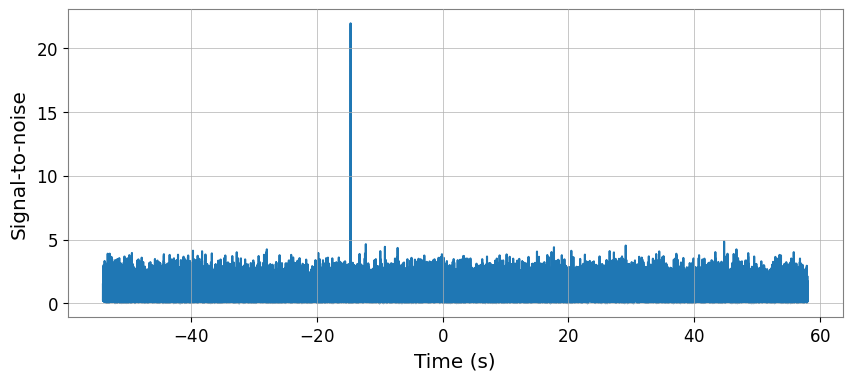

Signal found at -14.6328125s with SNR 21.954133898609896


In [19]:
import numpy as np
# resizes the template to match the data
hp.resize(len(conditioned))
# shifts the template to match the start time
template = hp.cyclic_time_shift(hp.start_time)
# generates the snr from the psd, data and template
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
# crops the snr to remove artifacts
snr = snr.crop(4 + 4, 4)
# plots the snr
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()
# finds the peak and its time
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
# prints the result
print("Signal found at {}s with SNR {}".format(time,
                                                    abs(snrp)))

# Assignment 1: Challenge 3

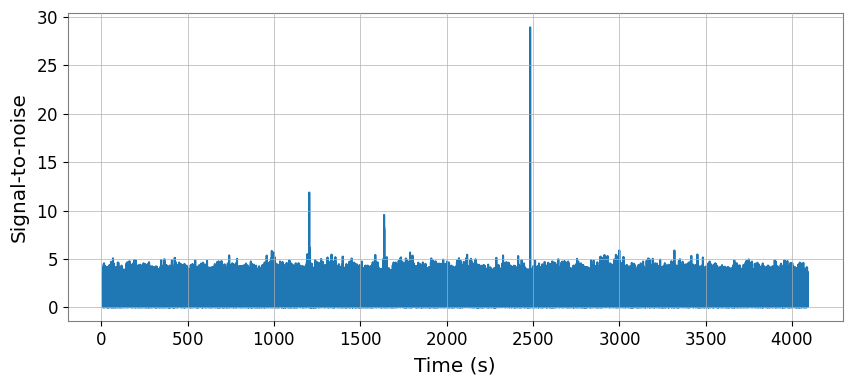

Signal found at 2483.96728515625s with SNR 28.91817759227571


In [20]:
# imports the data in a pycbc format
strain = frame.read_frame('/content/drive/My Drive/Colab Notebooks/challenge3.gwf', 'H1:CHALLENGE3')
# removes low frequency values
strain = highpass(strain, 15.0)
  # downsamples the data
strain = resample_to_delta_t(strain, 1.0/2048)
# crops the data to remove artifacts
conditioned = strain.crop(2, 2)
# generates a waveform template
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=strain.delta_t,
                         f_lower=15)
# generates a psd of the processed data
psd=conditioned.psd(4);
# matches the delta f of the psd and the data
psd = interpolate(psd, conditioned.delta_f)
# removes low frequency values from the psd
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)
# resizes the template to match the data
hp.resize(len(conditioned))
# shifts the template to match the start time
template = hp.cyclic_time_shift(hp.start_time)
# generates the snr from the psd, data and template
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
# crops the snr to remove artifacts
snr = snr.crop(4 + 4, 4)
# plots the snr
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()
# finds the peak and its time
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
# prints the result
print("Signal found at {}s with SNR {}".format(time,
                                                    abs(snrp)))

# Assignment 2: Challenge 2

In [ ]:
import pycbc
import numpy
from pycbc.types import FrequencySeries, TimeSeries
# Loads the data
strain = numpy.load('/content/drive/My Drive/Colab Notebooks/noise_ts_4096Hz.npy')
time = strain[:, 0];
strain = pycbc.types.TimeSeries(strain[:, 1], delta_t = time[1]-time[0]);
# Filters the low frequency values
strain = highpass(strain, 15.0)
# Crops the data to remove artifacts
conditioned = strain.crop(2, 2)

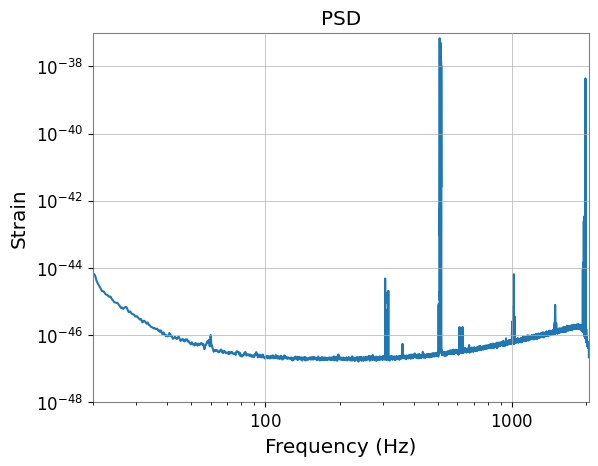

In [ ]:
# Generates a psd using the welch method with 4 second samples
psd=conditioned.psd(4);
# Interpolates the psd to match the data sample frequency
psd = interpolate(psd, conditioned.delta_f)
# Removes frequencies below 15 Hz to match the data highpass
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)
# Plots the PSD
plot=plt.loglog(psd.sample_frequencies, psd)
plt.xlim(xmin=20, xmax=psd.sample_rate/2)
plt.ylim(ymin=1e-48,ymax=1e-37)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.show()



In [ ]:
# Since the assignment said the mass value was between 5 and 10 solar masses I thought I'd write code that checked the mass
# in certain increments and returned highest peak with the corresponding mass.
# Turned out to be completely useless for the excercise but here it is anyway

# Minimum mass in the range you're looking for
m_min=5
# Size of the steps between each checked mass
m_step=1
# Maximum mass in the mass range
m_max=10
# Collects the highest peak for each mass
peaklist=[]
# Collects the times corresponding to the highest peaks
peaktimelist=[]
i=m_min
while i<=m_max:
#     Generates the waveform with the mass thats currently being checked
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=i,
                         mass2=i,
                         delta_t=conditioned.delta_t,
                         f_lower=15)
    hp.resize(len(conditioned))
    template = hp.cyclic_time_shift(hp.start_time)
#   Generates the snr with the current template
    snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
    snr = snr.crop(4 + 4, 4)
#     Finds the highest peak in the current snr
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    peaklist.append(abs(snrp))
    peaktimelist.append(time)
    i+=m_step
#     Finds the highest peak of all the checked masses and its corresponding time and mass
maxpeak=max(peaklist)
max_index=peaklist.index(maxpeak)
m_maxpeak=m_min+m_step*max_index
maxtime=peaktimelist[max_index]
print("Highest peak found was {} at {}s for a mass of {} solar masses.".format(maxpeak,maxtime,m_maxpeak)),
if maxpeak>=8:
    print('This corresponds to a gravitational wave signal')
else:
    print('This is not a meaningful signal.')

Highest peak found was 7.056261327041978 at 14.990234374625s for a mass of 10 solar masses.
This is not a meaningful signal.


In [ ]:
# crops the ends of the psd to avoid artifacts
psd[0] = psd[1]
psd[len(psd) - 1] = psd[len(psd) - 2]
# whitens the data
data_whitened = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()

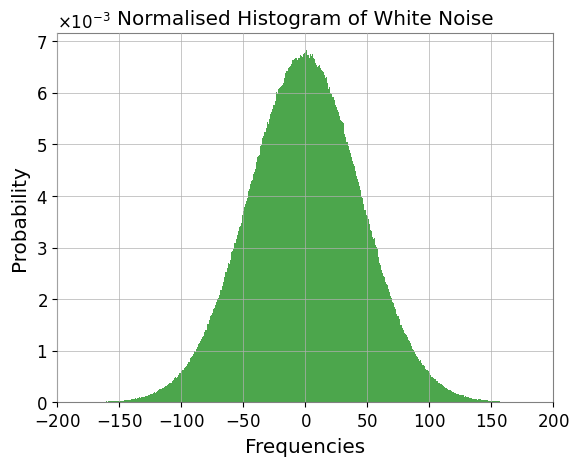

In [ ]:
# The total number of samples taken
tot_samples=data_whitened.sample_rate*data_whitened.duration
# Generates the histogram of the white noise
hist, edges=np.histogram(data_whitened,bins='auto');
# Normalises the probability values of the histogram
norm_hist=hist/tot_samples
# Plots the normalised histogram
plt.bar(edges[:-1], norm_hist, width=np.diff(edges), color='green', alpha=0.7)
plt.xlabel('Frequencies')
plt.ylabel('Probability')
plt.title('Normalised Histogram of White Noise')
plt.xlim(-200,200)
plt.show()

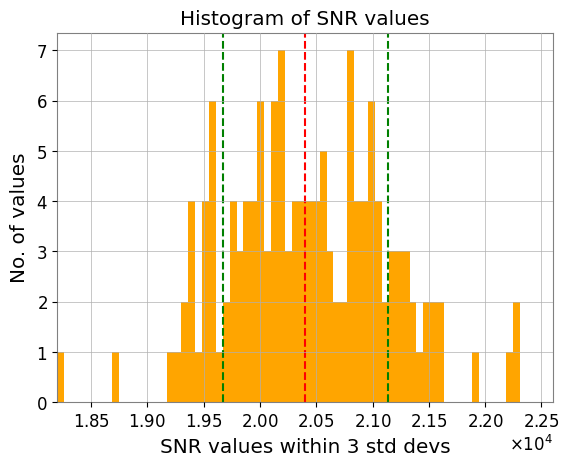

In [ ]:
from pycbc.filter import sigmasq
from pycbc.waveform import get_fd_waveform
# Number seconds in one slice of data
chunk_len=7
# Number of data slices
chunk_num=conditioned.duration/chunk_len

i=0
snr_list=[]
while i<chunk_num-1:
  chunk=conditioned.crop(i*chunk_len,(chunk_num-i-1)*chunk_len)
  # generates a waveform to match the chunk if necessary
  if hp.delta_f != chunk.delta_f:
    hp, hc = get_fd_waveform(approximant="TaylorF2",
                         mass1=20,
                         mass2=20,
                         delta_f=chunk.delta_f,
                         f_lower=15)
# Generates a psd using the welch method with 2 second samples
  psd=chunk.psd(2);
# Interpolates the psd to match the data sample frequency
  psd = interpolate(psd, chunk.delta_f)
# Removes frequencies below 15 Hz to match the data highpass
  psd = inverse_spectrum_truncation(psd, int(4 * chunk.sample_rate),low_frequency_cutoff=15)

  snr = (pycbc.filter.sigmasq(hp, psd))**0.5
  snr_list.append(snr)
  i+=1
plt.hist(snr_list,bins=70,color='orange');
plt.xlim(np.mean(snr_list)-3*np.std(snr_list),np.mean(snr_list)+3*np.std(snr_list))
# plots the mean
plt.axvline(x=np.mean(snr_list), color='r', linestyle='--')
# plots one std dev
plt.axvline(x=np.mean(snr_list)-np.std(snr_list), color='g', linestyle='--')
plt.axvline(x=np.mean(snr_list)+np.std(snr_list), color='g', linestyle='--')
plt.title('Histogram of SNR values')
plt.ylabel('No. of values')
plt.xlabel('SNR values within 3 std devs')
plt.show()

Since there is no signal present the SNR for each time slice should be approximately the same for gaussian stationary noise. Since there is a very clear non gaussian distribution the noise is non stationary.


# Assignment 2: Challenge 3

In [ ]:
import pycbc.psd
import numpy as np
# set up the lower cut off frequency
flow = 4.0
delta_f = 1.0 / 16
flen = int(2048.0/ (delta_f)) + 1
# loads the model psd
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
#set the value outside the frequency range to infinity
psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf

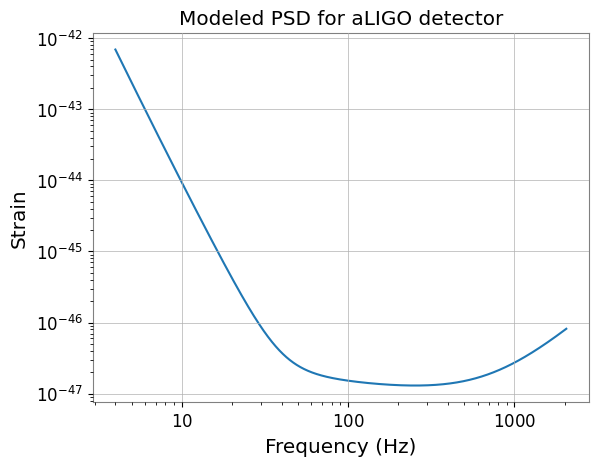

In [ ]:
# plots the model psd
plot=plt.loglog(psd.sample_frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.title('Modeled PSD for aLIGO detector')
plt.show()


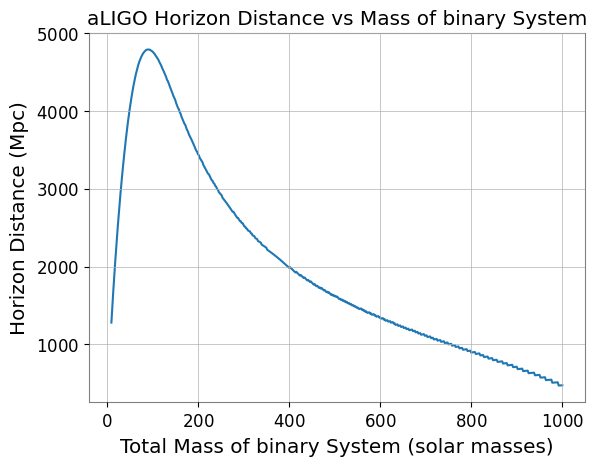

In [ ]:
# Minimum mass in the range you're looking for
m_min=5
# Size of the steps between each checked mass
m_step=1
# Maximum mass in the mass range
m_max=500
d=500
# Collects the horizon distance for each mass
hor_dlist=[]
# Collects the masses corresponding to the horizon distances
mlist=[]
i=m_min
while i<=m_max:
#     Generates the waveform with the current mass
  hp, hc = get_fd_waveform(approximant='TaylorF2',
                         mass1=i,
                         mass2=i,
                         delta_f=psd.delta_f,
                         distance= d,
                         f_lower=flow)
  # generates the snr for the current waveform
  snr = (pycbc.filter.sigmasq(hp, psd))**0.5
  # finds the horizon distance
  hor_d=d*snr/8
  # collects the data points
  hor_dlist.append(hor_d)
  mlist.append(2*i)
  i+=m_step
# plots the data
plt.plot(mlist,hor_dlist)
plt.title('aLIGO Horizon Distance vs Mass of binary System')
plt.ylabel('Horizon Distance (Mpc)')
plt.xlabel('Total Mass of binary System (solar masses)')
plt.show()

The horizon distance increases with mass up to a peak as the signal strength increases, until the signals start to move out of the optimal frequency range, which varies per detector, leading to a drop in horizon distance. The variations towards the upper end of the mass scale are due to the used approximant not being optimised for high masses.

In [ ]:
# generates the psd for ET Pathfinder
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)
psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf

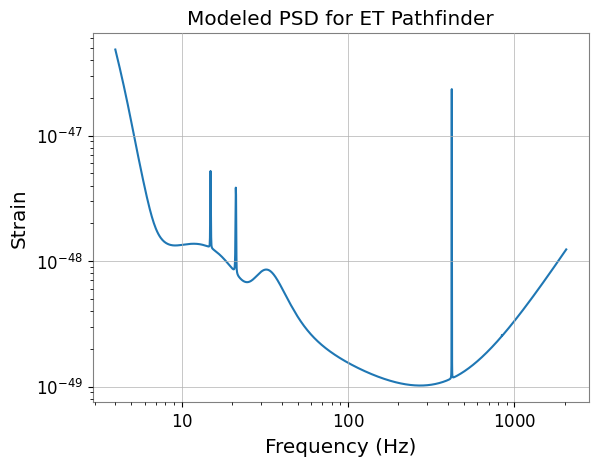

In [ ]:
# plots the psd
plot=plt.loglog(psd.sample_frequencies, psd)
plt.title('Modeled PSD for ET Pathfinder')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.show()

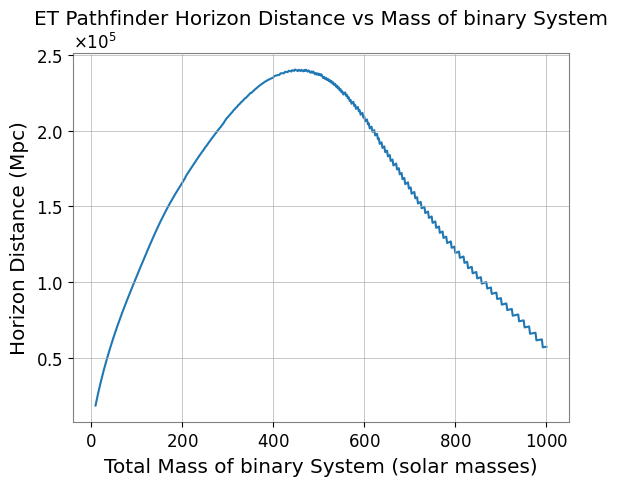

In [ ]:
# Minimum mass in the range you're looking for
m_min=5
# Size of the steps between each checked mass
m_step=1
# Maximum mass in the mass range
m_max=500
d=500
# Collects the horizon distance for each mass
hor_dlist=[]
# Collects the masses corresponding to the horizon distances
mlist=[]
i=m_min
while i<=m_max:
#     Generates the waveform with the current mass
  hp, hc = get_fd_waveform(approximant='TaylorF2',
                         mass1=i,
                         mass2=i,
                         delta_f=psd.delta_f,
                         distance= d,
                         f_lower=flow)
  # generates the snr for the current waveform
  snr = (pycbc.filter.sigmasq(hp, psd))**0.5
  # finds the horizon distance
  hor_d=d*snr/8
  # collects the data points
  hor_dlist.append(hor_d)
  mlist.append(2*i)
  i+=m_step
# plots the data
plt.plot(mlist,hor_dlist)
plt.title('ET Pathfinder Horizon Distance vs Mass of binary System')
plt.ylabel('Horizon Distance (Mpc)')
plt.xlabel('Total Mass of binary System (solar masses)')
plt.show()


The ET Pathfinder has a horizon distances which are in general two orders of magnitude higher than the aLIGO, but also has its horizon distance peak at around 500 solar masses, whereas aLIGO peaks at around 100. This makes the ET Pathfinder more effective for identifying much more massive binary systems at much higher distances.